## <b id="import-libraries">Importing </b> <b style='color:#1db6f5'>Libraries</b>

In [38]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #for reshaping graph size
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px

## <b id="import-libraries">Importing </b> <b style='color:#1db6f5'>Data</b>

In [4]:
url = "https://raw.githubusercontent.com/DanielCohen13/Fake_News/refs/heads/main/fake_news_dataset.csv"
fake_news_df = pd.read_csv(url)
fake_news_df.head()

id            title        author  \
0   1  Breaking News 1    Jane Smith   
1   2  Breaking News 2   Emily Davis   
2   3  Breaking News 3      John Doe   
3   4  Breaking News 4  Alex Johnson   
4   5  Breaking News 5   Emily Davis   

                                                text           state  \
0  This is the content of article 1. It contains ...       Tennessee   
1  This is the content of article 2. It contains ...       Wisconsin   
2  This is the content of article 3. It contains ...        Missouri   
3  This is the content of article 4. It contains ...  North Carolina   
4  This is the content of article 5. It contains ...      California   

  date_published          source       category  sentiment_score  word_count  \
0     30-11-2021       The Onion  Entertainment            -0.22        1302   
1     02-09-2021    The Guardian     Technology             0.92         322   
2     13-04-2021  New York Times         Sports             0.25         228   
3     08-03-2020             CNN         Sports             0.94         155   
4     23-03-2022      Daily Mail     Technology            -0.01         962   

   ...  num_shares  num_comments  political_bias  fact_check_rating  \
0  ...       47305           450          Center              FALSE   
1  ...       39804           530            Left              Mixed   
2  ...       45860           763          Center              Mixed   
3  ...       34222           945          Center               TRUE   
4  ...       35934           433           Right              Mixed   

   is_satirical  trust_score source_reputation clickbait_score  \
0             1           76                 6            0.84   
1             1            1                 5            0.85   
2             0           57                 1            0.72   
3             1           18                10            0.92   
4             0           95                 6            0.66   

   plagiarism_score  label  
0             53.35   Fake  
1             28.28   Fake  
2              0.38   Fake  
3             32.20   Fake  
4             77.70   Real  

[5 rows x 24 columns]

## <b id="import-libraries">Basic </b> <b style='color:#1db6f5'>EDA</b>

In [6]:
fake_news_df.shape

(4000, 24)

## Correlation

In [8]:
fake_news_df[["label", "fact_check_rating"]].value_counts()

label  fact_check_rating
Fake   FALSE                699
Real   Mixed                692
Fake   Mixed                680
       TRUE                 647
Real   FALSE                645
       TRUE                 637
Name: count, dtype: int64

In [9]:
# Filtering

filtered_df = fake_news_df[['category', 'sentiment_score', 'word_count', 'char_count', 'has_images',
       'has_videos', 'readability_score', 'num_shares', 'num_comments',
       'political_bias', 'fact_check_rating', 'is_satirical', 'trust_score',
       'source_reputation', 'clickbait_score', 'plagiarism_score', 'label']].copy()

In [34]:
ohe = OneHotEncoder()
feature_arry = ohe.fit_transform(filtered_df[["political_bias", "fact_check_rating", "label", "category"]]).toarray()
feature_labels = ohe.get_feature_names_out(["political_bias", "fact_check_rating", "label", "category"])
features = pd.DataFrame(feature_arry, columns=feature_labels)

filtered_df_numeric = filtered_df.drop(columns=["political_bias", "fact_check_rating", "label", "category"])

result_df = pd.concat([filtered_df_numeric, features], axis=1)

result_df["content"] = result_df['word_count'] + result_df['char_count'] + result_df['readability_score']
result_df["engagement"] = result_df['num_shares'] + result_df['num_comments'] + result_df['clickbait_score']
result_df["media_elements"] = ((result_df['has_images'] == 1) | (result_df['has_videos'] == 1)).astype(int)
fake_news_df["media_elements_new"] = result_df["media_elements"]
result_df["credibility_metrics"] = result_df['trust_score'] + result_df['source_reputation']
result_df["fact_checking"] = result_df['fact_check_rating_FALSE'] + result_df['fact_check_rating_Mixed'] + result_df['fact_check_rating_TRUE'] + result_df['label_Fake'] + result_df['label_Real']

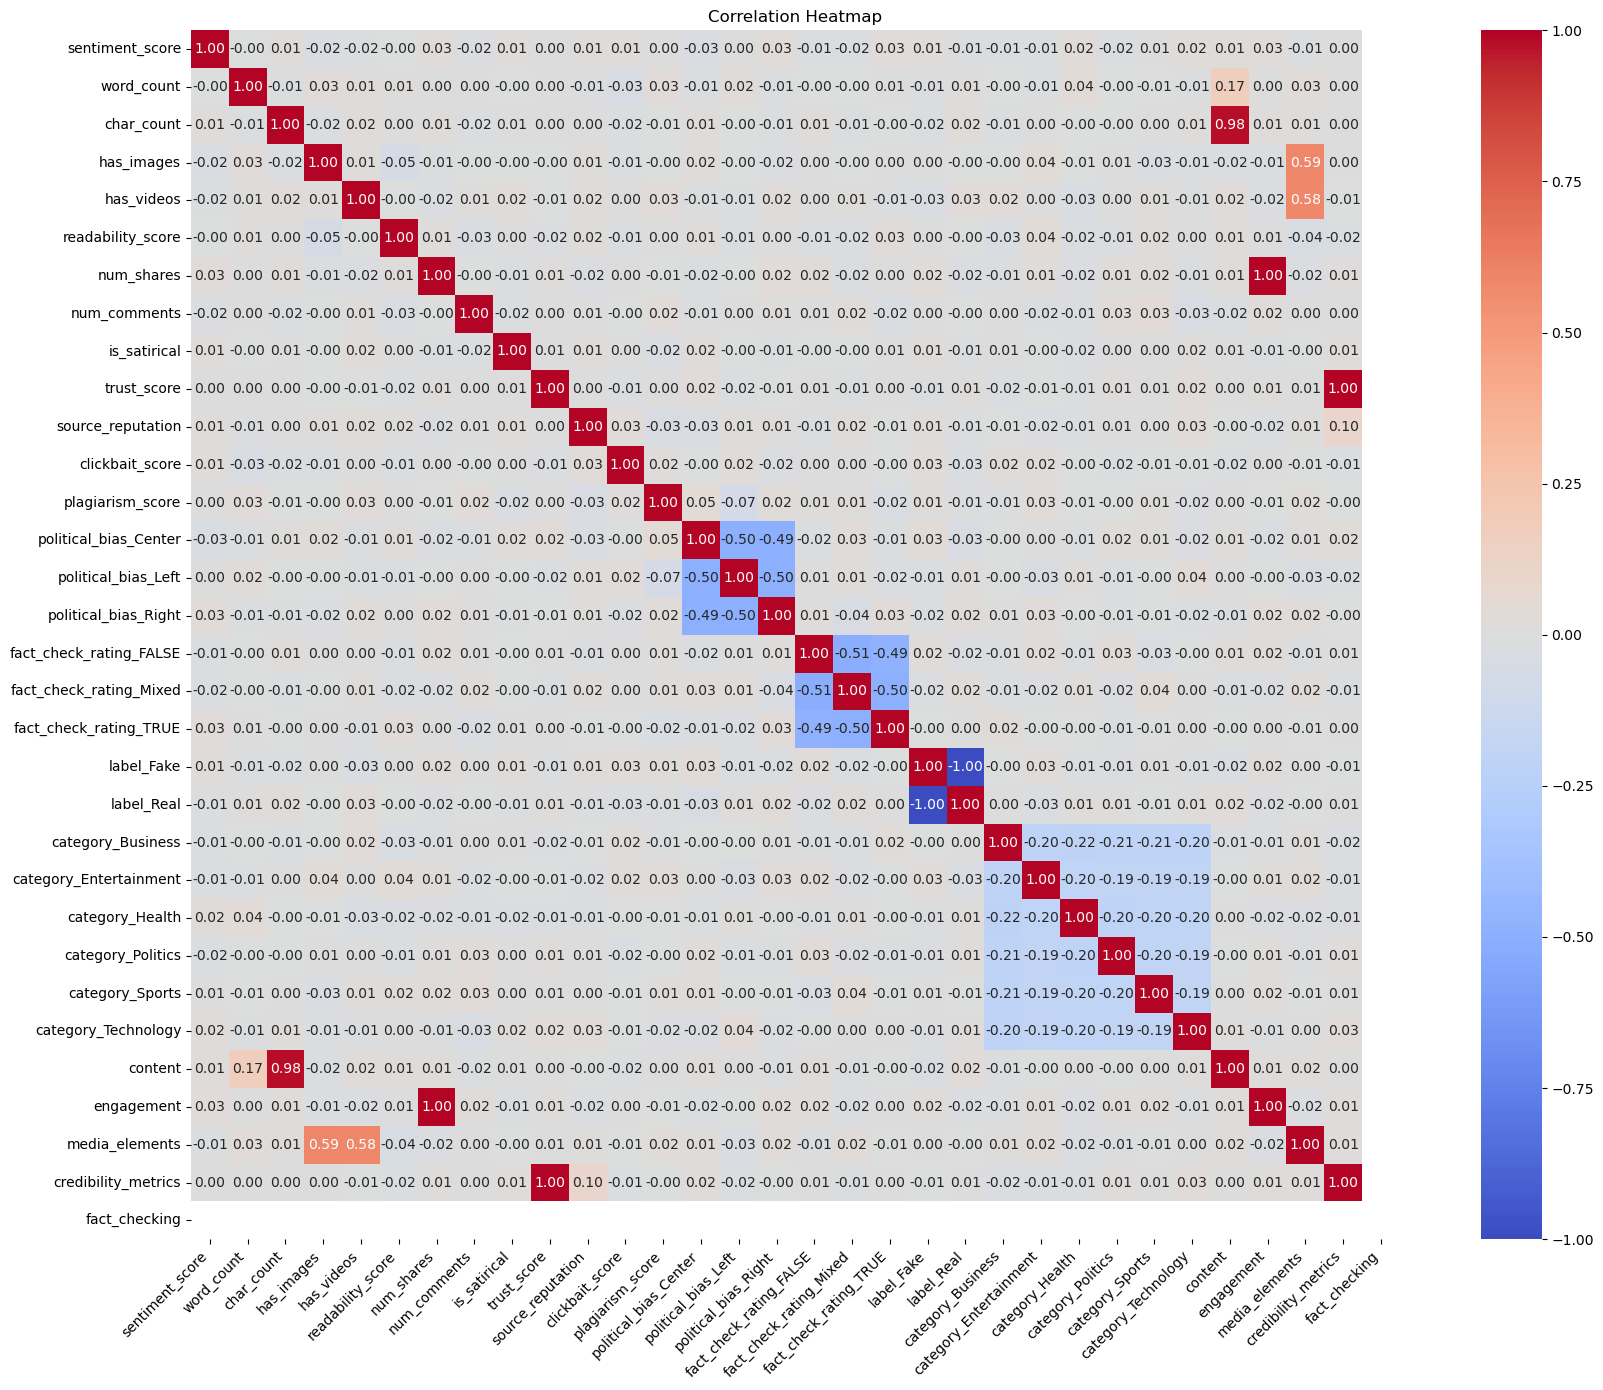

In [11]:
# Showing it with Heatmap
corr_matrix = result_df.corr()
plt.figure(figsize=(18, 14));
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True, fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()
plt.show()

### choosing specific columns for comparision

In [13]:
target_features = [
    'political_bias_Left', 'political_bias_Right', 'political_bias_Center',
    'category_Business', 'category_Entertainment', 'category_Politics', 'category_Sports',
    'fact_check_rating_FALSE', 'fact_check_rating_Mixed', 'fact_check_rating_TRUE',
    'label_Fake', 'label_Real'
]
comparison_features = ['sentiment_score', 'content', 'engagement', 'media_elements', 'credibility_metrics', 'plagiarism_score']

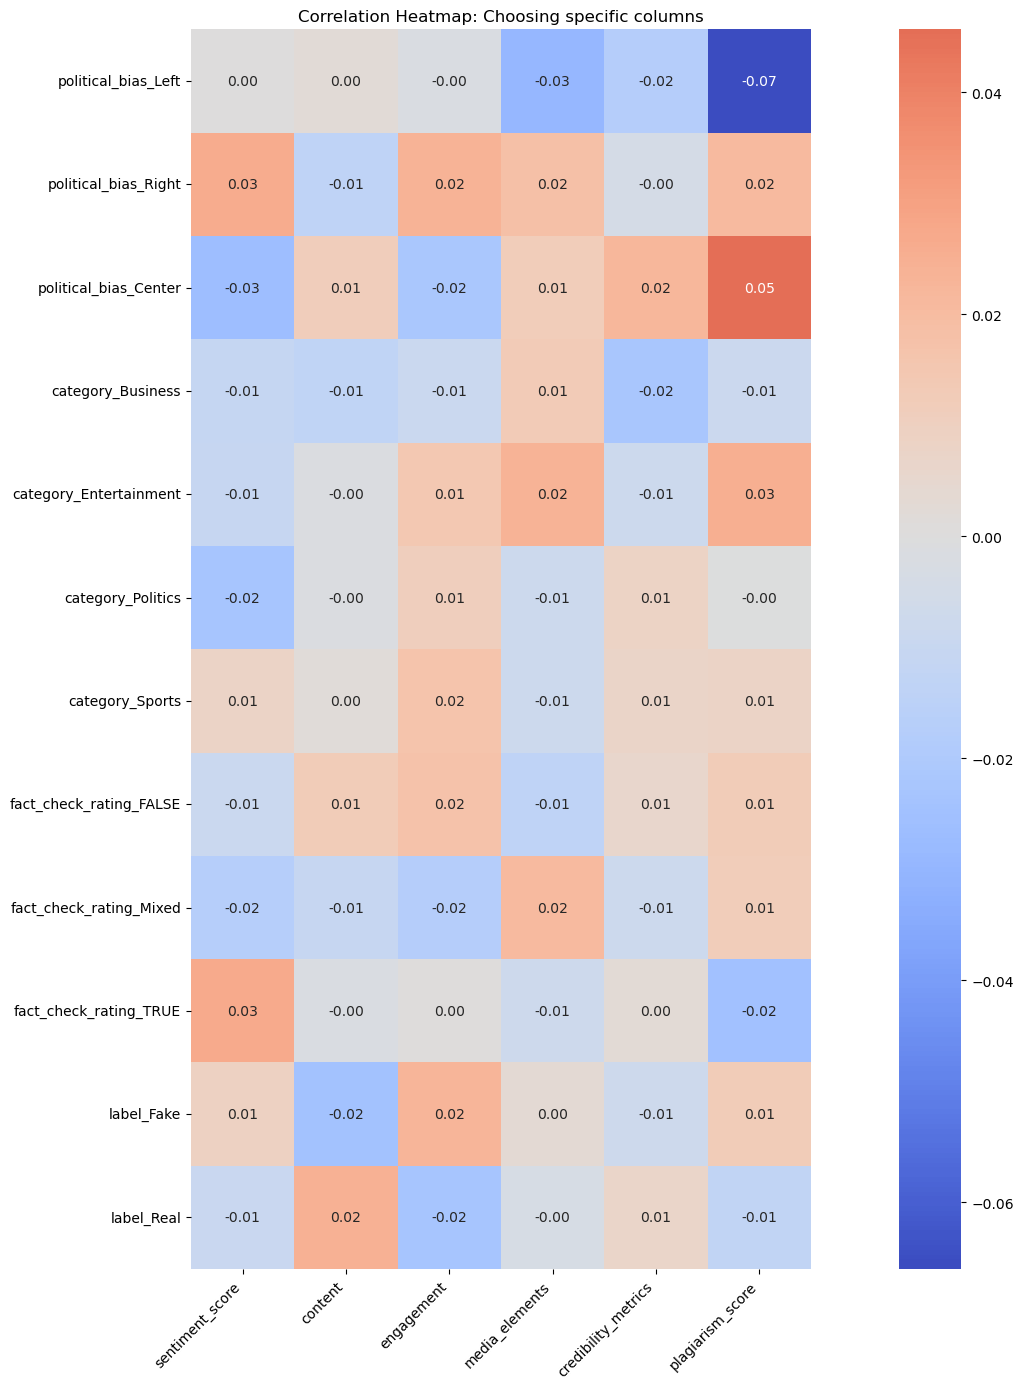

In [14]:
corr_matrix = result_df.corr()
heatmap_data = corr_matrix.loc[target_features, comparison_features]

plt.figure(figsize=(18, 14));
sns.heatmap(heatmap_data, cmap='coolwarm', center=0, annot=True, fmt=".2f", square=True)
plt.title("Correlation Heatmap: Choosing specific columns")
plt.xticks(rotation=45, ha = 'right')
plt.tight_layout()
plt.show()

## Data Understanding

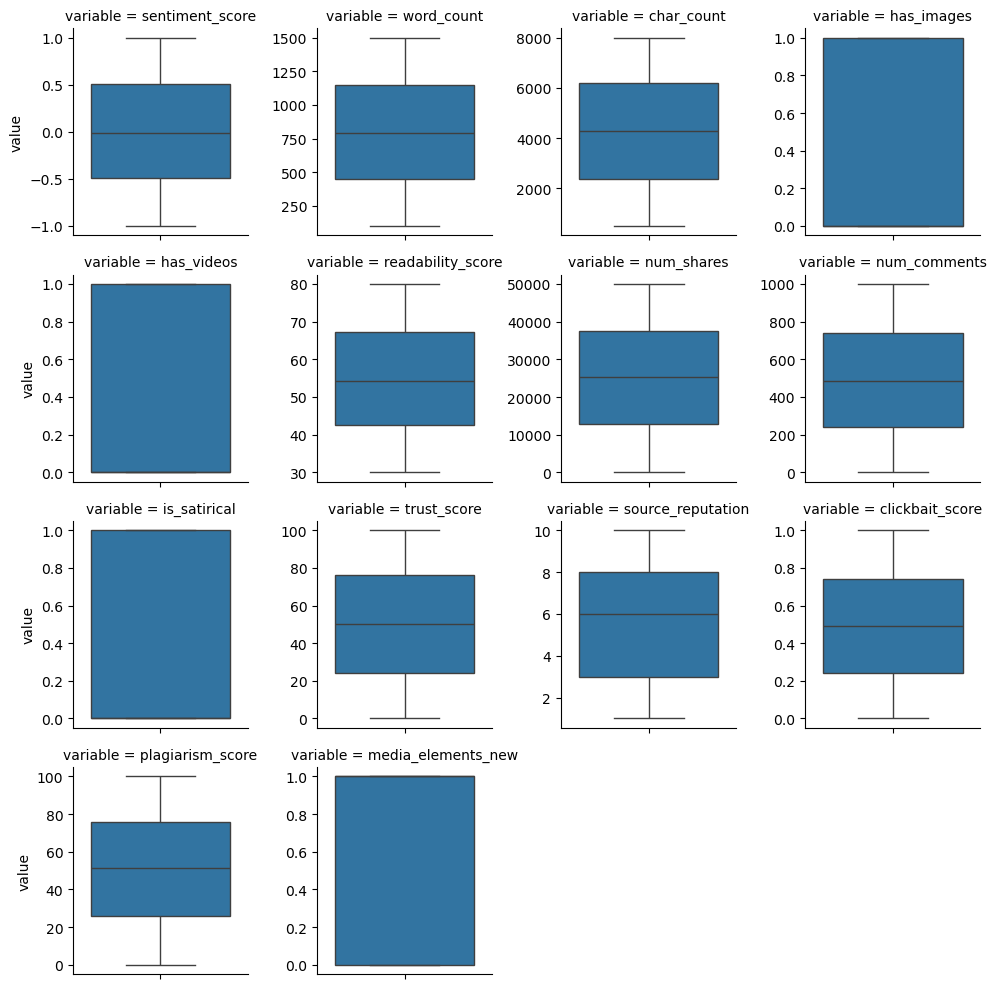

In [16]:
features = fake_news_df.select_dtypes(include='number').columns
melted_fake_news_df = pd.melt(fake_news_df, id_vars='id', value_vars=features.drop('id'))
g = sns.FacetGrid(data = melted_fake_news_df, col="variable", col_wrap=4, height=2.5, sharey = False)
g.map_dataframe(sns.boxplot, y = 'value')
plt.show()

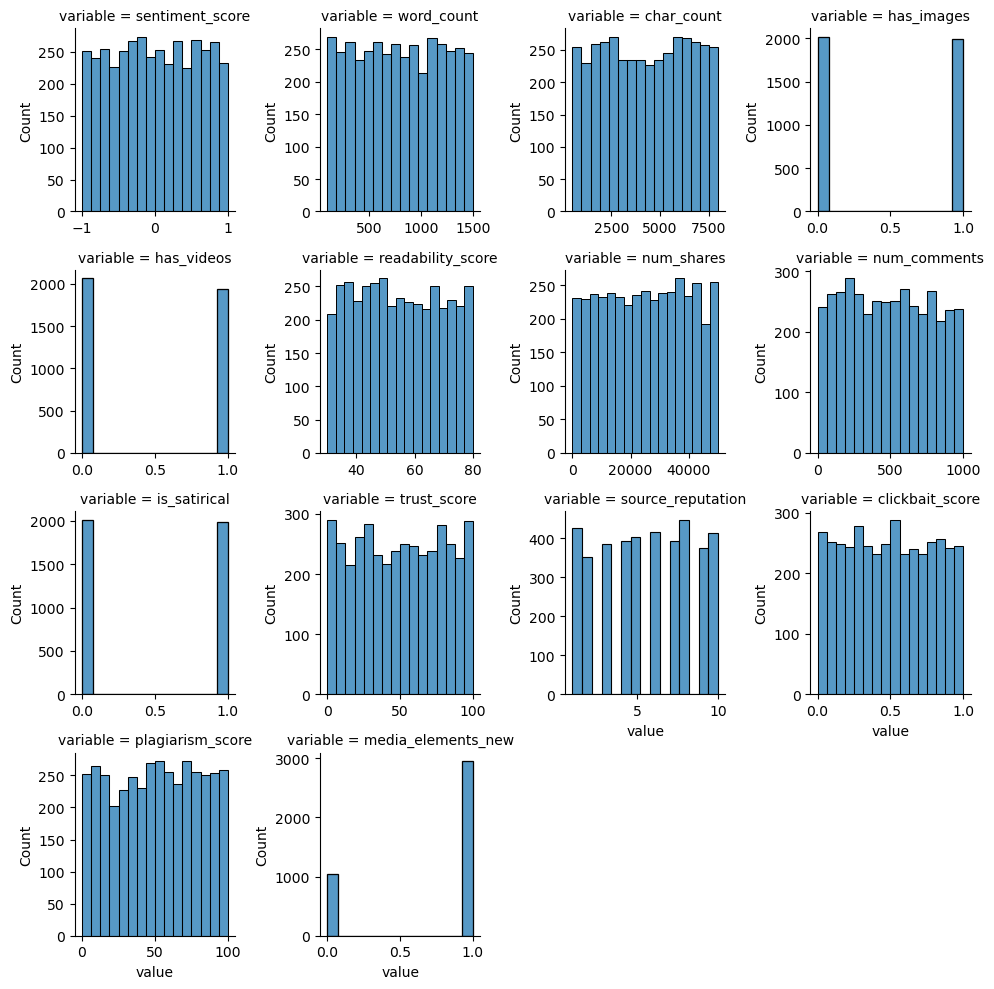

In [17]:
g = sns.FacetGrid(data = melted_fake_news_df, col="variable", col_wrap=4, height=2.5, sharey = False, sharex = False)
g.map_dataframe(sns.histplot, x = 'value')
plt.show()

## Comparisions

In [19]:
fake_news_df.columns

Index(['id', 'title', 'author', 'text', 'state', 'date_published', 'source',
       'category', 'sentiment_score', 'word_count', 'char_count', 'has_images',
       'has_videos', 'readability_score', 'num_shares', 'num_comments',
       'political_bias', 'fact_check_rating', 'is_satirical', 'trust_score',
       'source_reputation', 'clickbait_score', 'plagiarism_score', 'label',
       'media_elements_new'],
      dtype='object')

### Compare Categories to Facts Check

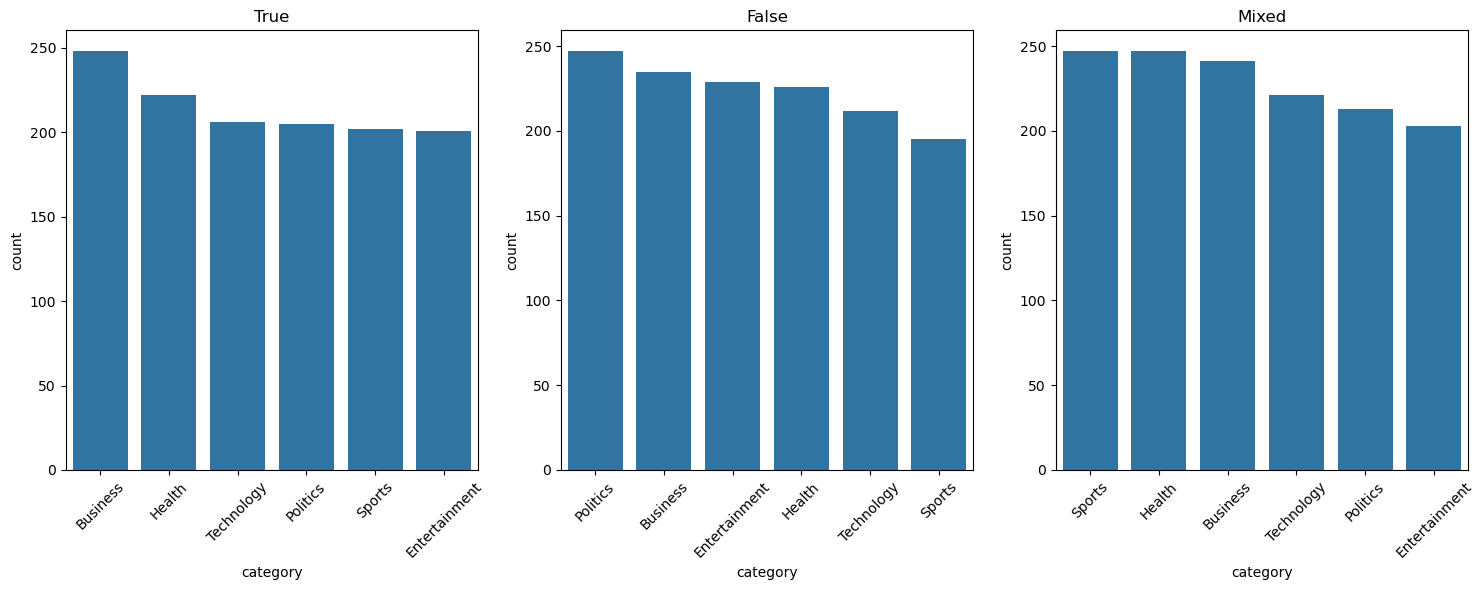

In [22]:
fact_True_df = fake_news_df[fake_news_df["fact_check_rating"] == "TRUE"]
fact_False_df = fake_news_df[fake_news_df["fact_check_rating"] == "FALSE"]
fact_Mixed_df = fake_news_df[fake_news_df["fact_check_rating"] == "Mixed"]

fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# TRUE
cat_order1 = fact_True_df['category'].value_counts().index.tolist()
sns.countplot(data=fact_True_df, x='category', ax=axes[0], order=cat_order1)
axes[0].set_title("True")
axes[0].tick_params(axis='x', rotation=45)

# FALSE
cat_order2 = fact_False_df['category'].value_counts().index.tolist()
sns.countplot(data=fact_False_df, x='category', ax=axes[1], order=cat_order2)
axes[1].set_title("False")
axes[1].tick_params(axis='x', rotation=45)

# MIXED
cat_order3 = fact_Mixed_df['category'].value_counts().index.tolist()
sns.countplot(data=fact_Mixed_df, x='category', ax=axes[2], order=cat_order3)
axes[2].set_title("Mixed")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

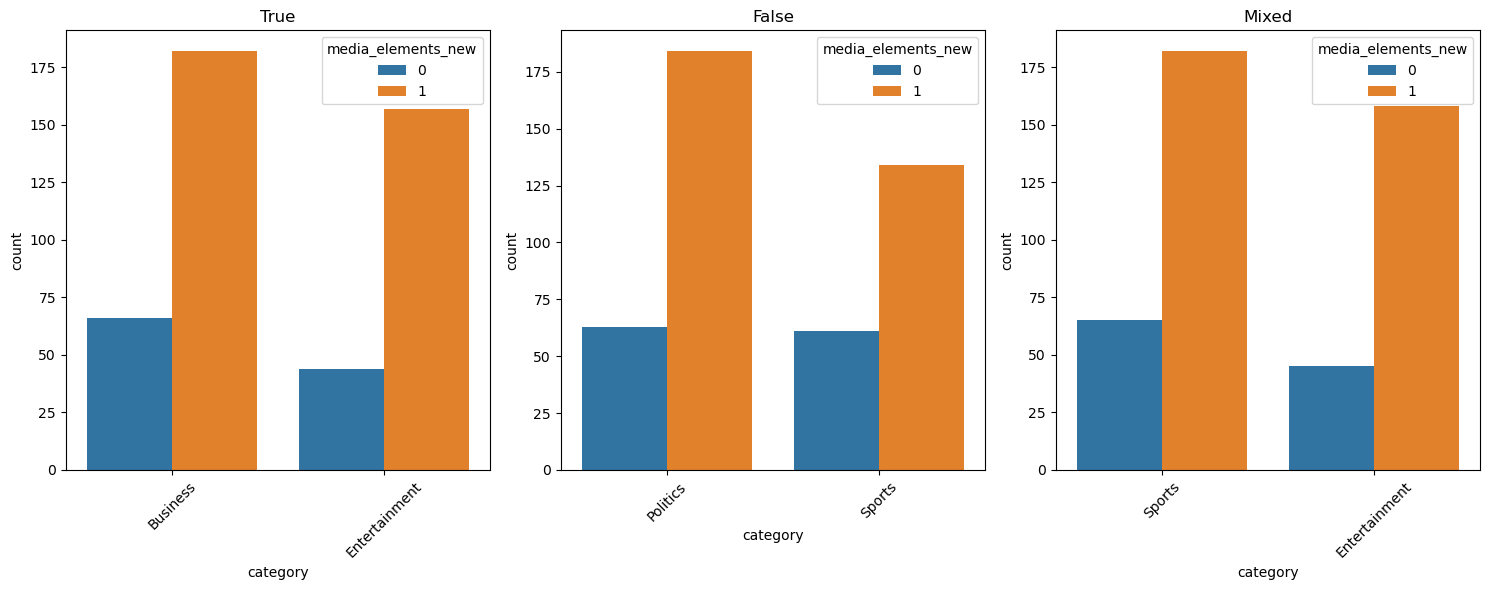

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# TRUE
true_counts = fact_True_df['category'].value_counts()
true_top = true_counts.idxmax()
true_bottom = true_counts.idxmin()
true_order = [true_top, true_bottom]

sns.countplot(data=fact_True_df[fact_True_df['category'].isin(true_order)], 
              x='category', ax=axes[0], order=true_order, hue = 'media_elements_new')
axes[0].set_title("True")
axes[0].tick_params(axis='x', rotation=45)

# FALSE
false_counts = fact_False_df['category'].value_counts()
false_top = false_counts.idxmax()
false_bottom = false_counts.idxmin()
false_order = [false_top, false_bottom]

sns.countplot(data=fact_False_df[fact_False_df['category'].isin(false_order)], 
              x='category', ax=axes[1], order=false_order, hue = 'media_elements_new')
axes[1].set_title("False")
axes[1].tick_params(axis='x', rotation=45)

# MIXED
mixed_counts = fact_Mixed_df['category'].value_counts()
mixed_top = mixed_counts.idxmax()
mixed_bottom = mixed_counts.idxmin()
mixed_order = [mixed_top, mixed_bottom]

sns.countplot(data=fact_Mixed_df[fact_Mixed_df['category'].isin(mixed_order)], 
              x='category', ax=axes[2], order=mixed_order, hue = 'media_elements_new')
axes[2].set_title("Mixed")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


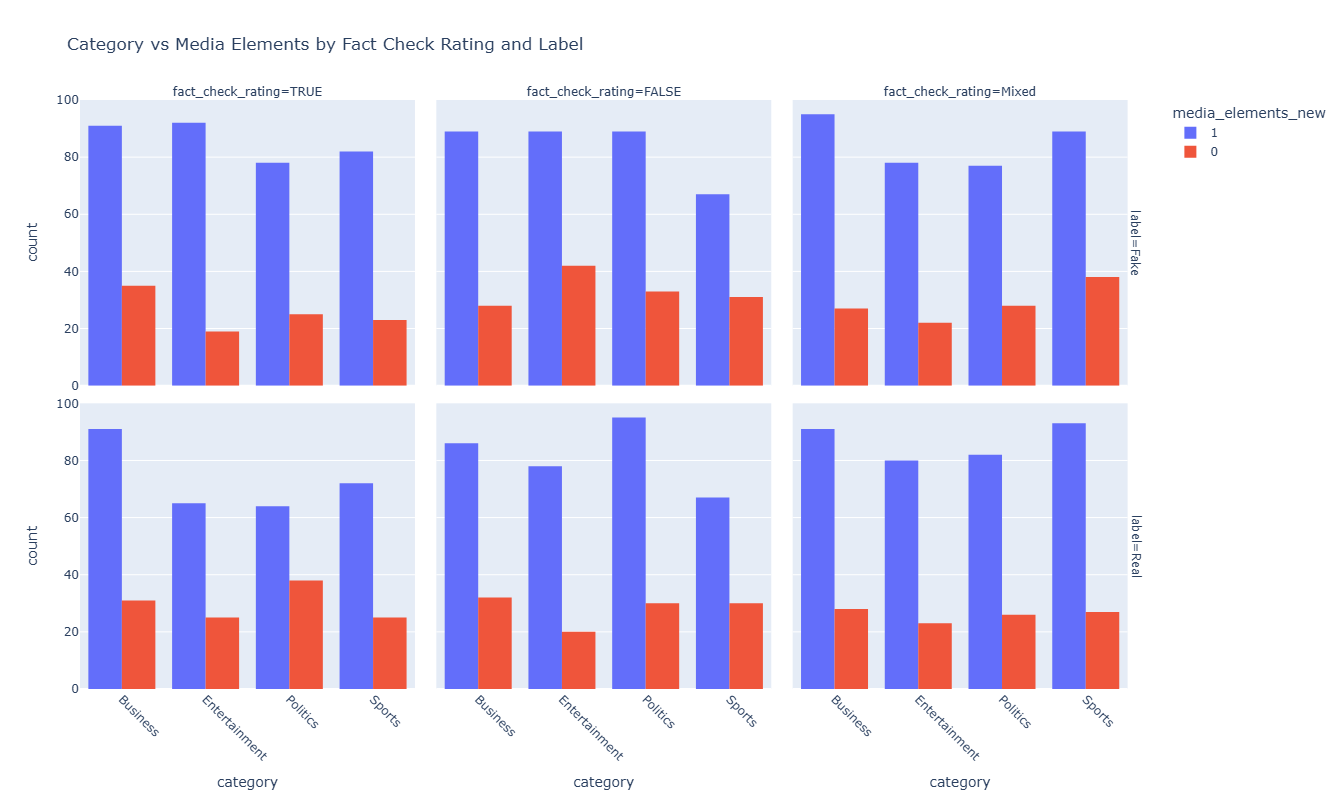

In [42]:
# Combine all into one DataFrame if not already done
combined_df = pd.concat([fact_True_df, fact_False_df, fact_Mixed_df])

# Optional: filter to just top & bottom categories of each group as before
top_bottom_categories = [
    fact_True_df['category'].value_counts().idxmax(),
    fact_True_df['category'].value_counts().idxmin(),
    fact_False_df['category'].value_counts().idxmax(),
    fact_False_df['category'].value_counts().idxmin(),
    fact_Mixed_df['category'].value_counts().idxmax(),
    fact_Mixed_df['category'].value_counts().idxmin()
]

filtered_df = combined_df[combined_df['category'].isin(top_bottom_categories)]

# Plot
fig = px.histogram(
    filtered_df,
    x="category",
    color="media_elements_new",
    barmode="group",
    facet_col="fact_check_rating",
    facet_row="label",
    category_orders={"category": sorted(filtered_df['category'].unique())},
    title="Category vs Media Elements by Fact Check Rating and Label"
)

fig.update_layout(height=800)
fig.update_xaxes(tickangle=45)
fig.show()

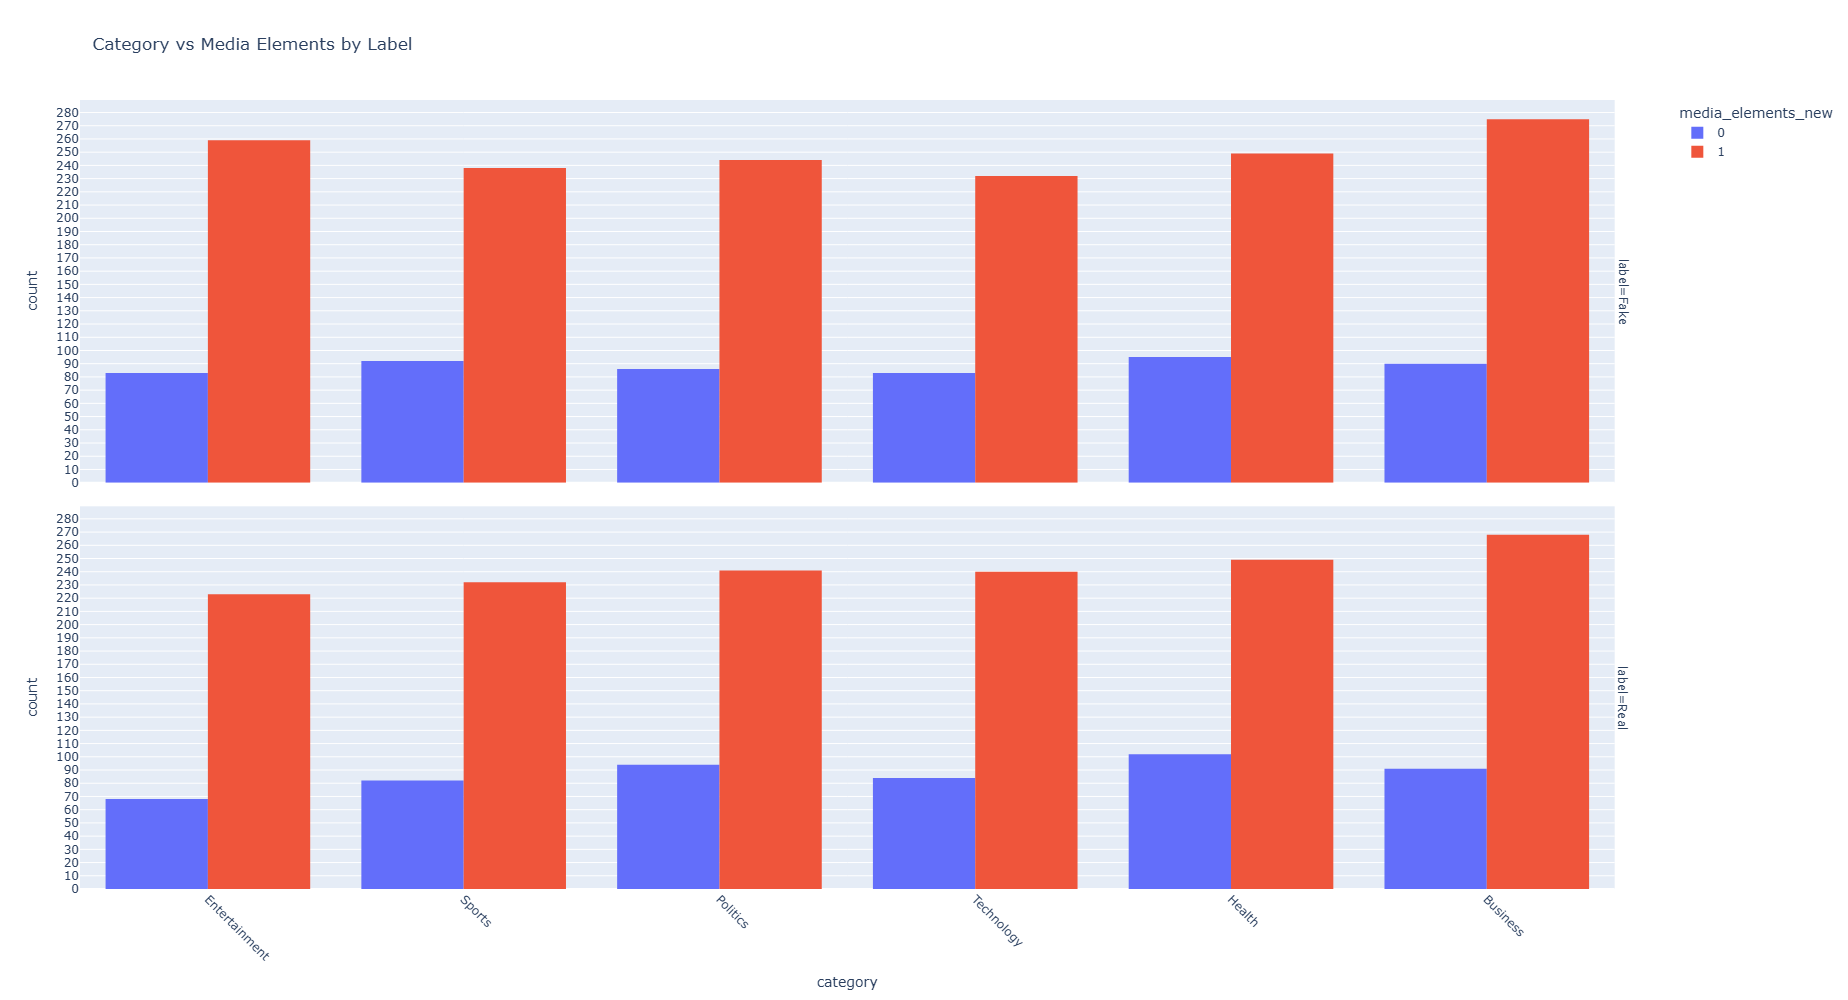

In [72]:
fig = px.histogram(
    fake_news_df,
    x="category",
    color="media_elements_new",     # Color shows presence of media elements
    facet_row="label",              # Separate row for each label (Fake/Real)
    barmode="group",                # Bars for 0 and 1 side by side
    title="Category vs Media Elements by Label"
)

fig.update_layout(height=1000)
fig.update_xaxes(tickangle=45)
fig.update_yaxes(tick0=0, dtick=10)
fig.show()

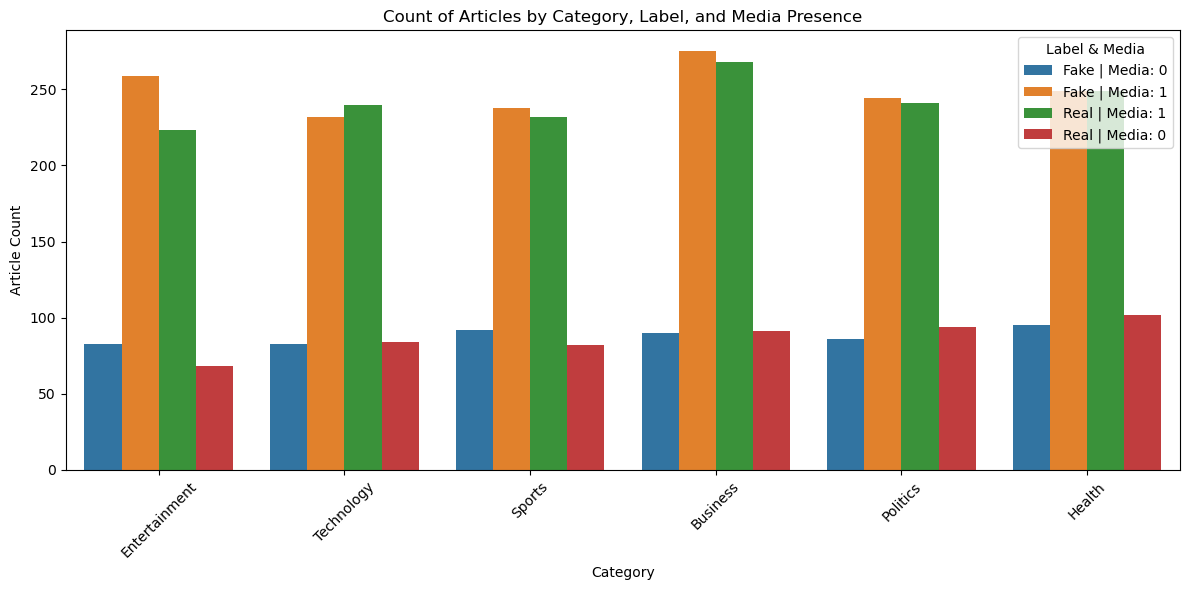

In [52]:
fake_news_df['label_media'] = fake_news_df['label'] + " | Media: " + fake_news_df['media_elements_new'].astype(str)

plt.figure(figsize=(12, 6))
sns.countplot(
    data=fake_news_df,
    x='category',
    hue='label_media'
)

plt.title("Count of Articles by Category, Label, and Media Presence")
plt.ylabel("Article Count")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.legend(title='Label & Media')
plt.tight_layout()
plt.show()

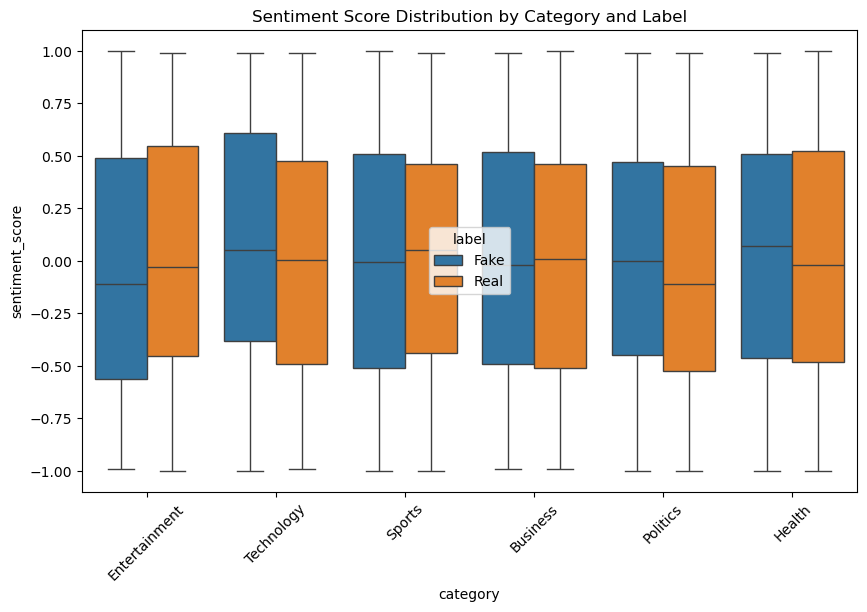

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=fake_news_df, x='category', y='sentiment_score', hue='label')
plt.title("Sentiment Score Distribution by Category and Label")
plt.xticks(rotation=45)
plt.show()

### השוואה בין רמת החיוביות והשליליות של הכתבות בקטגוריות השונות והאם הן אמיתיות או מזוייפות

In [ ]:
fake_news_df['sentiment_percent'] = (fake_news_df['sentiment_score'] + 1) * 50
plt.figure(figsize=(10, 6))
sns.boxplot(data=fake_news_df, x='category', y='sentiment_percent', hue='label')
plt.title("Sentiment Score (as Percentage) by Category and Label")
plt.ylabel("Sentiment (%)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
tech_df = fake_news_df[fake_news_df["category"] == "Technology"]

In [ ]:
fake_news_df["credibility_metrics_new"] = result_df["credibility_metrics"]
plt.figure(figsize=(10, 6))
sns.barplot(data=fake_news_df, x='media_elements_new', y='credibility_metrics_new', hue='label', ci=None)
plt.title("Average Credibility Score by Media Elements and Label")
plt.ylabel("Avg. Credibility Score")
plt.xlabel("Media Elements Present")
plt.show()

In [ ]:
plt.figure(figsize=(18, 6))
sns.boxplot(data=fake_news_df, x='source', y='credibility_metrics_new')
plt.title("Credibility Score destribution by Source and Label")
plt.ylabel("Credibility Score destribution")
plt.xlabel("Sources and Label")
plt.xticks(rotation = 45)
plt.show()

In [ ]:
new_df = fake_news_df[(fake_news_df["credibility_metrics_new"] > 90) & (fake_news_df["source"])]
plt.figure(figsize=(18, 6))
sns.boxplot(data=new_df, x='source', y='credibility_metrics_new')
plt.title("Credibility Score destribution by Source")
plt.ylabel("Credibility Score destribution")
plt.xlabel("Sources and Label")
plt.xticks(rotation = 45)
plt.show()

In [ ]:
sns.histplot(fake_news_df, x = 'credibility_metrics_new', kde=True);

In [ ]:
fake_news_df[["category", "credibility_metrics_new"]]